A la fin il faudrait donner le lien kaggle d'où sont venues les données

Import necessary librairies 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read the data

In [2]:
data_path= 'data\StudentPerformanceFactors.csv'
df_student= pd.read_csv(data_path, sep=',')

In [6]:
#Tail of the data (you can also see the head of the data)
df_student.tail()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [8]:
# Here you can see the shape and the type of your features or variables or columns
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

| **Attributes**      | **Description** |
| -----------         | ----------- |
| **Hours_Studied**          | Number of hours spent studying per week.      |
| **Attendance**             | Percentage of classes attended    |
| **Parental_Involvement**   | Level of parental involvement in the student's education (Low, Medium,High).  |
| **Access_to_Resources**    | Availability of educational resources (Low, Medium, High). |
|**Extracurricular_Activities** | Participation in extracurricular activities (Yes, No). |
|**Sleep_Hours**            | Average number of hours of sleep per night. |
|**Previous_Scores**        | Scores from previous exams  |
|**Motivation_Level**       | Student's level of motivation (Low, Medium, High).                               |
|**Internet_Access**        | Availability of internet access (Yes, No).                                       |
|**Tutoring_Sessions**      | Number of tutoring sessions attended per month.                                  |
|**Family_Income**          | Family income level (Low, Medium, High).                                         |
|**Teacher_Quality**        | Quality of the teachers (Low, Medium, High).                                     |
|**School_Type**            | Type of school attended (Public, Private).                                       |
|**Peer_Influence**         | Influence of peers on academic performance (Positive, Neutral, Negative).        |
|**Physical_Activity**      | Average number of hours of physical activity per week.                           |
|**Learning_Disabilities**  | Presence of learning disabilities (Yes, No).                                     |
|**Parental_Education_Level** | Highest education level of parents (High School, College, Postgraduate).      |
|**Distance_from_Home**     | Distance from home to school (Near, Moderate Far).                              |
|**Gender**                 | Gender of the student (Male, Female).                                            |
|**Exam_Score**             | Final exam score.|

In [22]:
df_student.isnull().sum()>1

Hours_Studied                 False
Attendance                    False
Parental_Involvement          False
Access_to_Resources           False
Extracurricular_Activities    False
Sleep_Hours                   False
Previous_Scores               False
Motivation_Level              False
Internet_Access               False
Tutoring_Sessions             False
Family_Income                 False
Teacher_Quality                True
School_Type                   False
Peer_Influence                False
Physical_Activity             False
Learning_Disabilities         False
Parental_Education_Level       True
Distance_from_Home             True
Gender                        False
Exam_Score                    False
dtype: bool

In [29]:
# Missing values percentage
missing_values= df_student.isnull().sum()[ df_student.isnull().sum() > 1]
missing_values*100/len(df_student)

Teacher_Quality             1.180566
Parental_Education_Level    1.362192
Distance_from_Home          1.014076
dtype: float64

In this case study, the percentage of missing values is very low. It encourages us either to keep data like that or finding a way of completing missing data. Now we should investigate of the type of missing values we are facing on. It is **MCAR** ? **MAR** ? or may be **MNAR** ?

*Link*:

- https://www.iriseekhout.com/post/2022-06-28-missingdatamechanisms/#:~:text=Data%20are%20missing%20not%20at,missing%20observations%20for%20this%20variable.

- https://stefvanbuuren.name/fimd/sec-MCAR.html

Let's check it out!

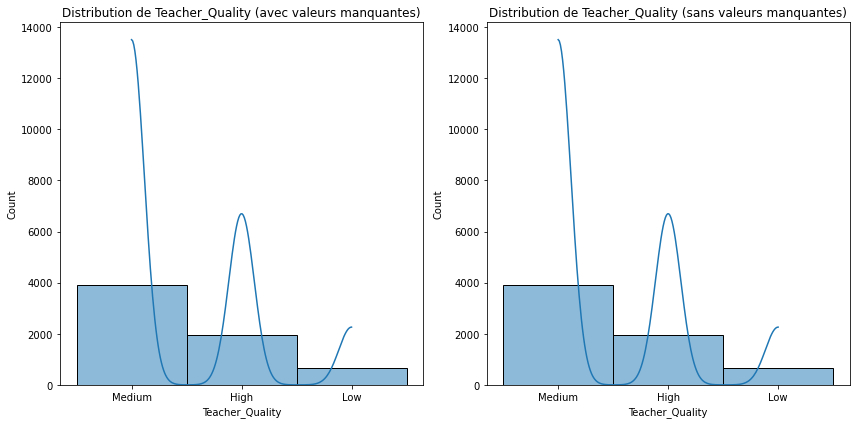

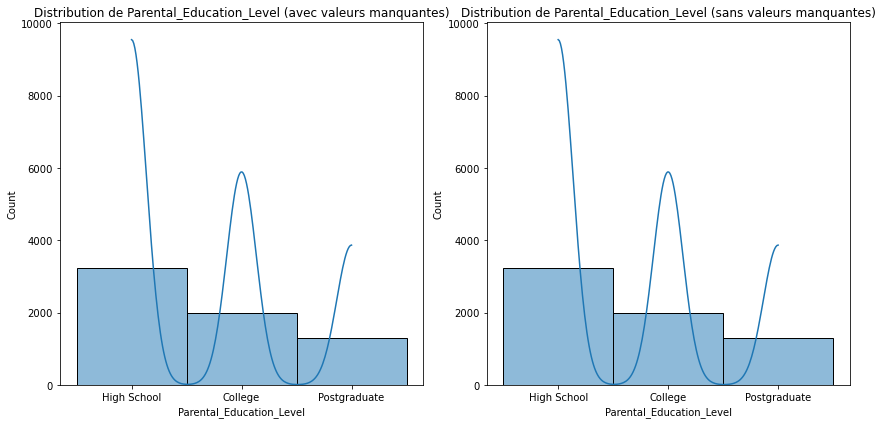

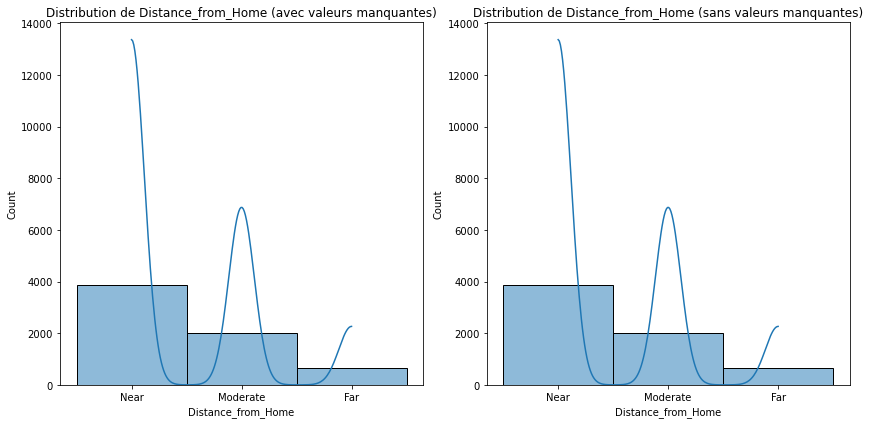

In [31]:
#Columns with missing values
missing_columns = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

# Show the distribution function of each missing values columns
for col in missing_columns:
    plt.figure(figsize=(12, 6))

    # Distribution with missing values
    plt.subplot(1, 2, 1)
    sns.histplot(df_student[col], kde=True, bins= "auto")
    plt.title(f'Distribution of {col} (with missing values)')

    # Distribution without missing values
    plt.subplot(1, 2, 2)
    sns.histplot(df_student[col].dropna(), kde=True, bins="auto")
    plt.title(f'Distribution of {col} (without missing values)')

    plt.tight_layout()
    plt.show()

As the figures above show, the distribution of columns does not really change either in case of missing of values or not. It seems like we are in MCAR case. This method is just a tip but it is not reliable all the time. 
Other methods consist on χ2 test to evaluate the independance of the columns with missing values with others. 
- https://www.kaggle.com/code/yassirarezki/handling-missing-data-mcar-mar-and-mnar-part-i/notebook#Detect-the-MCAR-pattern
- https://journals.sagepub.com/doi/pdf/10.1177/1536867X1301300407

We assume to not delete or impute missing data and just keep our dataset with those missing values

In [38]:
# Check duplicated values
df_student.duplicated().sum()

0

In [39]:
"""
Garbage values
We found garbage values usually in object columns
"""

for i in df_student.select_dtypes('object').columns:
    print(df_student[i].value_counts())# you can also use unique function but it'll display only occurence but not the frequence
    print("***"*10)

Medium    3362
High      1908
Low       1337
Name: Parental_Involvement, dtype: int64
******************************
Medium    3319
High      1975
Low       1313
Name: Access_to_Resources, dtype: int64
******************************
Yes    3938
No     2669
Name: Extracurricular_Activities, dtype: int64
******************************
Medium    3351
Low       1937
High      1319
Name: Motivation_Level, dtype: int64
******************************
Yes    6108
No      499
Name: Internet_Access, dtype: int64
******************************
Low       2672
Medium    2666
High      1269
Name: Family_Income, dtype: int64
******************************
Medium    3925
High      1947
Low        657
Name: Teacher_Quality, dtype: int64
******************************
Public     4598
Private    2009
Name: School_Type, dtype: int64
******************************
Positive    2638
Neutral     2592
Negative    1377
Name: Peer_Influence, dtype: int64
******************************
No     5912
Yes     695
Nam

There is no longer garbage values in our columns